# 参数

In [57]:
TRAIN_SIZE = 5000
VAL_SIZE = 1000

# 导入mnist数据集

In [58]:
import tensorflow.keras as keras
# 导入mnist
from keras.datasets import mnist

In [59]:
# 拆分训练集和测试集
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 查看训练数据

In [60]:
# 查看数据类型
type(train_images)

numpy.ndarray

In [61]:
train_images.shape

(60000, 28, 28)

In [62]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# 查看测试数据

In [63]:
test_images.shape

(10000, 28, 28)

In [64]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# 作图查看mnist

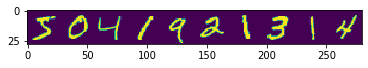

In [65]:
import numpy as np
import matplotlib.pyplot as plt
digits = np.concatenate(train_images[:10], axis=1) 
plt.imshow(digits)
plt.show()

# 从训练集中提取出验证集

In [66]:
val_images, val_labels = train_images[:VAL_SIZE], train_labels[:VAL_SIZE]
new_train_images, new_train_labels = train_images[-TRAIN_SIZE:], train_labels[-TRAIN_SIZE:]
new_train_images.shape

(5000, 28, 28)

# 输入输出转成向量——可以用flatten层代替

In [67]:
#  输入的28*28图像转成向量  用flatten
train_vectors = new_train_images.reshape((TRAIN_SIZE, 28 * 28))
test_vectors = test_images.reshape((10000, 28 * 28))
val_vectors = val_images.reshape((VAL_SIZE, 28 * 28))

# 检查训练集输入
train_vectors.shape

(5000, 784)

In [68]:
from keras.utils import to_categorical

# 将labels转为one-hot向量
train_one_hots = to_categorical(new_train_labels)
test_one_hots = to_categorical(test_labels)
val_one_hots = to_categorical(val_labels)

# 检查训练集输出
train_one_hots.shape

(5000, 10)

# 归一化

In [69]:
print('归一化前：', train_vectors[0][110:150])
print()

train_vectors_norm = train_vectors.astype('float32') / 255
test_vectors_norm = test_vectors.astype('float32') / 255
val_vectors_norm = val_vectors.astype('float32') / 255

print('归一化后：', train_vectors_norm[0][110:150])

归一化前： [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  38 237 220  11   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0]

归一化后： [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.14901961 0.92941177 0.8627451  0.04313726
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


# 搭建网络

In [70]:
# 导入
from keras import models
from keras import layers
from keras import regularizers
from keras import initializers


# 搭建网路
network = models.Sequential()
kernel_regularizer =  None #regularizers.l2(1)
kernel_initializer= 'glorot_uniform'
activation =None#layers.LeakyReLU(alpha=0.3)
activation_layer = layers.LeakyReLU(alpha=0.3) #layers.Activation('relu')

# 第一层
network.add(layers.Dense(64, activation=activation, kernel_regularizer=kernel_regularizer, kernel_initializer=kernel_initializer, input_shape=(28 * 28,))) # relu
network.add(layers.BatchNormalization())
network.add(activation_layer)

for i in range(50):
    network.add(layers.Dense(64, activation=activation , kernel_regularizer=kernel_regularizer, kernel_initializer=kernel_initializer)) # relu, sigmoid
    network.add(layers.BatchNormalization())
    network.add(activation_layer)
    
network.add(layers.Dense(10, kernel_regularizer=kernel_regularizer, kernel_initializer=kernel_initializer))
network.add(layers.BatchNormalization())
network.add( layers.Activation('softmax'))

network.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_187 (Dense)            (None, 64)                50240     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dense_188 (Dense)            (None, 64)                4160      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_189 (Dense)            (None, 64)                4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)              

# 编译网络

In [71]:
from keras import optimizers
network.compile(optimizer=optimizers.adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy']) #mean_squared_error


# 训练

In [72]:
history = network.fit(train_vectors_norm, train_one_hots, epochs=200, batch_size=256, validation_data=(val_vectors_norm, val_one_hots))

Train on 5000 samples, validate on 1000 samples
Epoch 1/200
5000/5000 [==============================] - 20s 4ms/step - loss: 2.2139 - accuracy: 0.2078 - val_loss: 2055.2806 - val_accuracy: 0.0940
Epoch 2/200
5000/5000 [==============================] - 1s 138us/step - loss: 1.5283 - accuracy: 0.4752 - val_loss: 678.4523 - val_accuracy: 0.2020
Epoch 3/200
5000/5000 [==============================] - 1s 136us/step - loss: 1.1246 - accuracy: 0.6258 - val_loss: 620.1625 - val_accuracy: 0.2400
Epoch 4/200
5000/5000 [==============================] - 1s 137us/step - loss: 0.8580 - accuracy: 0.7240 - val_loss: 620.1750 - val_accuracy: 0.2750
Epoch 5/200
5000/5000 [==============================] - 1s 136us/step - loss: 0.7439 - accuracy: 0.7626 - val_loss: 316.9840 - val_accuracy: 0.4380
Epoch 6/200
5000/5000 [==============================] - 1s 129us/step - loss: 0.6690 - accuracy: 0.7924 - val_loss: 101.1124 - val_accuracy: 0.5470
Epoch 7/200
5000/5000 [==============================] - 1

5000/5000 [==============================] - 1s 126us/step - loss: 0.6185 - accuracy: 0.8266 - val_loss: 35.7367 - val_accuracy: 0.6150
Epoch 56/200
5000/5000 [==============================] - 1s 125us/step - loss: 0.4971 - accuracy: 0.8646 - val_loss: 16.2125 - val_accuracy: 0.5930
Epoch 57/200
5000/5000 [==============================] - 1s 151us/step - loss: 0.4266 - accuracy: 0.8844 - val_loss: 9.5298 - val_accuracy: 0.7210
Epoch 58/200
5000/5000 [==============================] - 1s 125us/step - loss: 0.3879 - accuracy: 0.8964 - val_loss: 6.7336 - val_accuracy: 0.6150
Epoch 59/200
5000/5000 [==============================] - 1s 128us/step - loss: 0.4588 - accuracy: 0.8880 - val_loss: 5.6001 - val_accuracy: 0.6670
Epoch 60/200
5000/5000 [==============================] - 1s 209us/step - loss: 0.4093 - accuracy: 0.8976 - val_loss: 4.9438 - val_accuracy: 0.7020
Epoch 61/200
5000/5000 [==============================] - 1s 231us/step - loss: 0.3773 - accuracy: 0.9042 - val_loss: 6.547

5000/5000 [==============================] - 1s 125us/step - loss: 0.7224 - accuracy: 0.7504 - val_loss: 28.9712 - val_accuracy: 0.4590
Epoch 111/200
5000/5000 [==============================] - 1s 128us/step - loss: 0.6172 - accuracy: 0.8052 - val_loss: 45.3357 - val_accuracy: 0.4710
Epoch 112/200
5000/5000 [==============================] - 1s 127us/step - loss: 0.5853 - accuracy: 0.8276 - val_loss: 32.0487 - val_accuracy: 0.4620
Epoch 113/200
5000/5000 [==============================] - 1s 126us/step - loss: 0.5556 - accuracy: 0.8452 - val_loss: 33.0515 - val_accuracy: 0.4740
Epoch 114/200
5000/5000 [==============================] - 1s 127us/step - loss: 0.5079 - accuracy: 0.8682 - val_loss: 31.2251 - val_accuracy: 0.4510
Epoch 115/200
5000/5000 [==============================] - 1s 126us/step - loss: 0.5145 - accuracy: 0.8562 - val_loss: 22.6604 - val_accuracy: 0.4710
Epoch 116/200
5000/5000 [==============================] - 1s 127us/step - loss: 0.5668 - accuracy: 0.8402 - val_l

Epoch 165/200
5000/5000 [==============================] - 1s 150us/step - loss: 1.1008 - accuracy: 0.6202 - val_loss: 53.5817 - val_accuracy: 0.2360
Epoch 166/200
5000/5000 [==============================] - 1s 128us/step - loss: 1.1760 - accuracy: 0.6042 - val_loss: 23.2696 - val_accuracy: 0.3430
Epoch 167/200
5000/5000 [==============================] - 1s 162us/step - loss: 1.0120 - accuracy: 0.6426 - val_loss: 12.0170 - val_accuracy: 0.4150
Epoch 168/200
5000/5000 [==============================] - 1s 127us/step - loss: 1.0353 - accuracy: 0.6378 - val_loss: 10.2907 - val_accuracy: 0.4090
Epoch 169/200
5000/5000 [==============================] - 1s 126us/step - loss: 0.9400 - accuracy: 0.6758 - val_loss: 8.2486 - val_accuracy: 0.4400
Epoch 170/200
5000/5000 [==============================] - 1s 125us/step - loss: 0.8884 - accuracy: 0.6876 - val_loss: 6.0124 - val_accuracy: 0.4520
Epoch 171/200
5000/5000 [==============================] - 1s 178us/step - loss: 0.9387 - accuracy: 0.

In [73]:
# 取出训练的中间数据：损失和准确度
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

In [74]:
# 查看准确率
train_best_acc = f'{round(acc_values[-1]*100,2)}%'
val_best_acc =  f'{round(val_acc_values[-1]*100,2)}%'
print(f"训练集准确率为：{train_best_acc}， 验证集准确率为：{val_best_acc}")

训练集准确率为：80.16%， 验证集准确率为：45.4%


# 作图

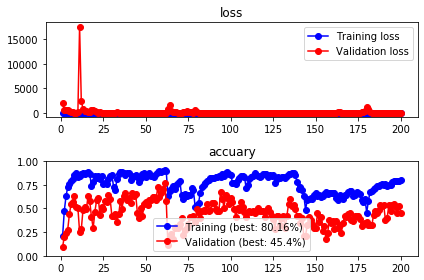

In [75]:

fig, axes = plt.subplots(2,1)
epochs = range(1, len(loss_values) + 1)

# 损失
axes[0].plot(epochs, loss_values, 'b-o', label='Training loss')
axes[0].plot(epochs, val_loss_values, 'r-o', label='Validation loss')
axes[0].legend()
axes[0].set_title('loss')

# 准确度
axes[1].plot(epochs, acc_values, 'b-o', label=f'Training (best: {train_best_acc})')
axes[1].plot(epochs, val_acc_values, 'r-o', label=f'Validation (best: {val_best_acc})')
axes[1].legend()
axes[1].set_title('accuary')
axes[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

# 测试

In [76]:
test_loss, test_acc = network.evaluate(test_vectors_norm, test_one_hots)

10000/10000 [==============================] - 1s 107us/step


# 自定义预测

In [92]:
# 预测一张 
network.predict(test_vectors_norm[0][None])

array([[1.9908111e-36, 2.7522531e-24, 5.9113445e-25, 2.8792378e-30,
        2.0034069e-26, 9.2629055e-36, 5.8976183e-28, 1.0000000e+00,
        1.7343716e-35, 1.3098857e-29]], dtype=float32)

In [93]:
# 预测多张
network.predict(test_vectors_norm[:2])

array([[1.9907959e-36, 2.7522426e-24, 5.9112991e-25, 2.8792160e-30,
        2.0033915e-26, 9.2628345e-36, 5.8975509e-28, 1.0000000e+00,
        1.7343584e-35, 1.3098758e-29],
       [3.9261697e-15, 1.5064974e-09, 1.0000000e+00, 2.3736438e-10,
        2.9452919e-11, 1.6771991e-13, 7.6494935e-11, 2.2122315e-09,
        3.7176453e-09, 8.0565079e-13]], dtype=float32)